# Exploring the Reuters Dataset
First, let's have a look what the Reuters dataset looks like.Conviniently, the `nltk` library already contains the dataset.

In [1]:
from nltk.corpus import reuters

labels = reuters.categories()
print(f'There are a total of {len(labels)} Reuters categories')
print(f'The first ten categories are: {labels[:10]}')

doc_ids = reuters.fileids()
print(f'Total number of samples: {len(doc_ids)}')


ModuleNotFoundError: No module named 'nltk'

To keep things simple, we only use articles that are assigned to a single category. 

In [2]:
# First, create a dictionary that maps doc_id to their assigned categories

doc_dict = dict(zip(doc_ids,[reuters.categories(doc_id) for doc_id in doc_ids]))

# Then only take the elements that belong to a single class

single_doc_dict = {key: value[0] for key, value in doc_dict.items() if len(value)==1}
print(f'Total number of single class samples: {len(single_doc_dict)}')

Total number of single class samples: 9160


For further analysis, it is easier to create a dictionary that maps categories to sample ids.

In [3]:
from collections import defaultdict
cat_dict = defaultdict(list)
for key, value in single_doc_dict.items():
    cat_dict[value].append(key)
repr(cat_dict['carcass'])

"['test/18034', 'test/18099', 'test/18276', 'test/18277', 'test/18352', 'training/10334', 'training/11278', 'training/11544', 'training/1407', 'training/6317', 'training/6804']"

Let's see which categories are most frequent

In [4]:
from collections import Counter
#Get category frequencies
cat_freq = Counter({key: len(value) for key, value in cat_dict.items()})

# 20 most common topics
R20 = cat_freq.most_common(20)
R20_cats = [c[0] for c in R20]

# 8 most common topics
R8 = cat_freq.most_common(8)
R8_cats = [c[0] for c in R8]

repr(R20_cats)

"['earn', 'acq', 'crude', 'trade', 'money-fx', 'interest', 'money-supply', 'ship', 'sugar', 'coffee', 'gold', 'gnp', 'cpi', 'cocoa', 'grain', 'alum', 'jobs', 'reserves', 'ipi', 'copper']"

In [5]:
# Get a random sample from them 
import random
sample_cat = random.choice(R20_cats)
sample_id = random.sample(cat_dict[sample_cat],1)
print(f'Text:\n\n {reuters.raw(sample_id)}Label: {reuters.categories(sample_id)[0]}')

Text:

 FHLBB CHANGES SHORT-TERM DISCOUNT NOTE RATES
  The Federal Home Loan Bank Board
  adjusted the rates on its short-term discount notes as follows:
      MATURITY   NEW RATE  OLD RATE  MATURITY
    30-174 days  5.00 pct  5.00 pct   30-174 days
   175-190 days  5.88 pct  5.85 pct  175-190 days
   191-270 days  5.00 pct  5.00 pct  191-270 days
   271-288 days  5.92 pct  5.92 pct  271-288 days
   289-360 days  5.00 pct  5.00 pct  289-360 days
  

Label: interest


## Visualization of R20 topic frequencies

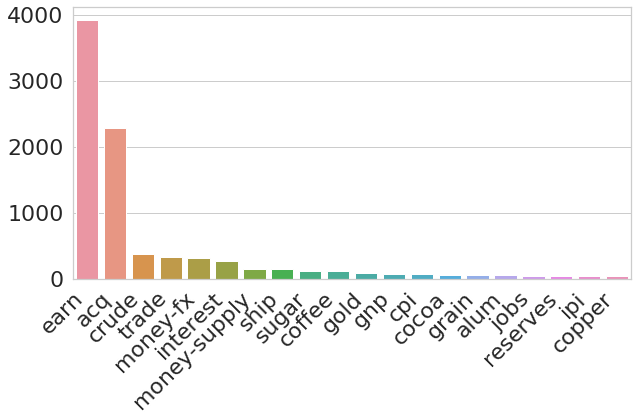

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
sns.set(style="whitegrid",  font_scale=2)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=np.array(R20)[:,0], y = np.array(R20)[:,1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');